In [ ]:
import numpy as np
import graphviz as gv

## Max Heap

In [ ]:
class ArrayBintree:
    def __init__(self, dtype, height, emptydata=-9999):
        self.dtype = dtype
        self.height = height
        self.emptydata = emptydata
        self.array_size = 2**(height+1) - 1
        self.array = np.empty(self.array_size, dtype=dtype)
        for i in range(self.array_size):
            self.array[i] = emptydata

    def get_root(self):
        root_data = self.array[0]
        if root_data == self.emptydata:
            return None
        else:
            return root_data

    def set_root(self, newdata):
        self.array[0] = newdata

    def get_data(self, node_idx):
        if node_idx < self.array_size:
            return self.array[node_idx]
        else:
            print("Error get_data: indeks di luar ukuran tree")
            return None

    def set_data(self, node_idx, newdata):
        if node_idx < self.array_size:
            self.array[node_idx] = newdata
        else:
            print("Error set_data: indeks di luar ukuran tree")

    def get_left_child_idx(self, node_idx):
        left_idx = 2*node_idx + 1
        if left_idx < self.array_size:
            return left_idx
        else:
            return -1

    def get_left_child(self, node_idx):
        left_idx = self.get_left_child_idx(node_idx)
        if left_idx != -1:
            data = self.array[left_idx]
            if data != self.emptydata:
                return data
            else:
                return None
        else:
            return None

    def get_right_child_idx(self, node_idx):
        right_idx = 2*node_idx + 2
        if right_idx < self.array_size:
            return right_idx
        else:
            return -1

    def get_right_child(self, node_idx):
        right_idx = self.get_right_child_idx(node_idx)
        if right_idx != -1:
            data = self.array[right_idx]
            if data != self.emptydata:
                return data
            else:
                return None
        else:
            return None

    def get_parent_idx(self, node_idx):
        if node_idx == 0:
            return -1
        idx = int(np.floor( (node_idx - 1)/2 ))
        return idx

    # preorder: tengah, kiri, kanan
    def get_preorder(self, current=0, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []

        # tengah
        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)

        # kiri
        left_idx = self.get_left_child_idx(current)
        if left_idx != -1:
            self.get_preorder(current=left_idx, result=result)

        # kanan
        right_idx = self.get_right_child_idx(current)
        if right_idx != -1:
            self.get_preorder(current=right_idx, result=result)

        if is_starting_node:
            return result

    # inorder: kiri, tengah, kanan
    def get_inorder(self, current=0, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []

        # kiri
        left_idx = self.get_left_child_idx(current)
        if left_idx != -1:
            self.get_inorder(current=left_idx, result=result)

        # tengah
        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)

        # kanan
        right_idx = self.get_right_child_idx(current)
        if right_idx != -1:
            self.get_inorder(current=right_idx, result=result)

        if is_starting_node:
            return result

    # postorder: kiri, kanan, tengah
    def get_postorder(self, current=0, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []

        # kiri
        left_idx = self.get_left_child_idx(current)
        if left_idx != -1:
            self.get_postorder(current=left_idx, result=result)

        # kanan
        right_idx = self.get_right_child_idx(current)
        if right_idx != -1:
            self.get_postorder(current=right_idx, result=result)

        # tengah
        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)

        if is_starting_node:
            return result

    def get_digraph_simple(self):
        digraph = gv.Digraph()
        for idx in range(self.array_size):
            data = self.array[idx]
            if data != self.emptydata:
                digraph.node("node" + str(idx), label=str(data))
                left_idx = self.get_left_child_idx(idx)
                right_idx = self.get_right_child_idx(idx)
                if left_idx != -1:
                    digraph.edge("node" + str(idx), "node" + str(left_idx))
                    if self.array[left_idx] == self.emptydata:
                        digraph.node("node" + str(left_idx), label="NULL", shape="none")
                if right_idx != -1:
                    digraph.edge("node" + str(idx), "node" + str(right_idx))
                    if self.array[right_idx] == self.emptydata:
                        digraph.node("node" + str(right_idx), label="NULL", shape="none")
        return digraph

In [ ]:
class ArrayMaxHeap(ArrayBintree):
    def __init__(self, dtype, height, emptydata=-9999):
        super().__init__(dtype, height, emptydata)
        self.n_nodes = 0

    def is_correct_parent_child_data(self, parent_data, child_data):
        if (parent_data >= child_data):
            return True
        else:
            return False

    def completify(self):
        for i in range(self.array_size):
            for j in range(i, 0, -1):
                if ((self.array[j] != self.emptydata) and (self.array[j-1] == self.emptydata)):
                    self.array[j-1] = self.array[j]
                    self.array[j] = self.emptydata
        i = 0
        while (i < self.array_size) and (self.array[i] != self.emptydata):
            i += 1
        self.n_nodes = i

    def heapify_bottomup(self, child_idx):
        if child_idx > 0:
            parent_idx = self.get_parent_idx(child_idx)
            if not (self.is_correct_parent_child_data(self.array[parent_idx], self.array[child_idx])):
                temp = self.array[parent_idx]
                self.array[parent_idx] = self.array[child_idx]
                self.array[child_idx] = temp
            self.heapify_bottomup(parent_idx)

    def insert(self, newdata):
        if self.n_nodes == self.array_size:
            print("error insert: array heap sudah penuh")
        else:
            self.array[self.n_nodes] = newdata
            self.heapify_bottomup(self.n_nodes)
            self.n_nodes += 1

    def heapify_topdown(self, parent_idx=None):
        if parent_idx == None:
            parent_idx = 0

        left_idx = self.get_left_child_idx(parent_idx)
        right_idx = self.get_right_child_idx(parent_idx)

        if ((left_idx != -1) and (right_idx != -1)
        and (self.array[left_idx] != self.emptydata)
        and (self.array[right_idx] != self.emptydata)):
            if self.is_correct_parent_child_data(
                self.array[left_idx], self.array[right_idx]
            ):
                child_idx = left_idx
            else:
                child_idx = right_idx
        elif (left_idx != -1) and (self.array[left_idx] != self.emptydata):
            child_idx = left_idx
        elif (right_idx != -1) and (self.array[right_idx] != self.emptydata):
            child_idx = right_idx
        else:
            return

        if self.is_correct_parent_child_data(
            self.array[child_idx], self.array[parent_idx]
        ):
            temp = self.array[child_idx]
            self.array[child_idx] = self.array[parent_idx]
            self.array[parent_idx] = temp

        self.heapify_topdown(child_idx)

    def peek(self):
        nilai = self.get_root()
        if nilai == self.emptydata:
            print("error peek: heap tree sedang kosong")
            return None
        else:
            return nilai

    def delete(self):
        nilai_root = self.get_root()
        if nilai_root == self.emptydata:
            print("error delete: heap tree sudah kosong sebelumnya")
            return None
        self.set_root(self.array[self.n_nodes-1])

        self.array[self.n_nodes-1] = self.emptydata
        self.n_nodes -= 1

        self.heapify_topdown()

        return nilai_root

    def heapify_all(self):
        for child_idx in range(self.n_nodes, 0 , -1):
            parent_idx = self.get_parent_idx(child_idx)
            if not (self.is_correct_parent_child_data(
                self.array[parent_idx], self.array[child_idx]
            )):
                temp = self.array[parent_idx]
                self.array[parent_idx] = self.array[child_idx]
                self.array[child_idx] = temp



In [ ]:
bintree1 = ArrayMaxHeap(int, 3)

In [ ]:
list1 = [11, 22, 44, 77, -9999, 66, -9999, 33]
for i in range(len(list1)):
    bintree1.array[i] = list1[i]

In [ ]:
print(bintree1.array)

[   11    22    44    77 -9999    66 -9999    33 -9999 -9999 -9999 -9999
 -9999 -9999 -9999]


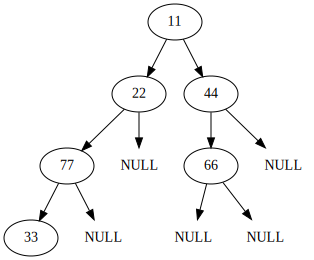

In [ ]:
display(bintree1.get_digraph_simple())

In [ ]:
bintree1.completify()

In [ ]:
print(bintree1.array)

[   11    22    44    77    66    33 -9999 -9999 -9999 -9999 -9999 -9999
 -9999 -9999 -9999]


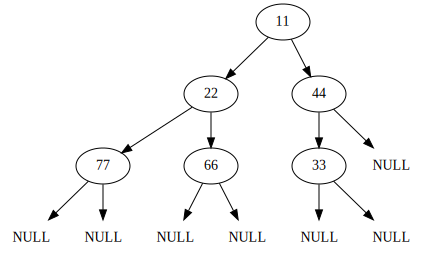

In [ ]:
display(bintree1.get_digraph_simple())

In [ ]:
bintree1.array[3]

77

In [ ]:
bintree1.heapify_bottomup(3)

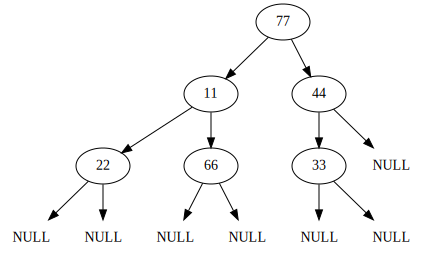

In [ ]:
display(bintree1.get_digraph_simple())

In [ ]:
bintree1.heapify_topdown()

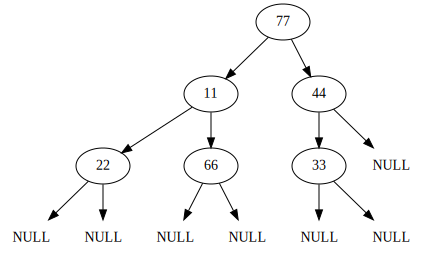

In [ ]:
display(bintree1.get_digraph_simple())

In [ ]:
print(bintree1.array)

[   77    11    44    22    66    33 -9999 -9999 -9999 -9999 -9999 -9999
 -9999 -9999 -9999]


In [ ]:
bintree1.array[5]

33

In [ ]:
bintree1.heapify_bottomup(5)

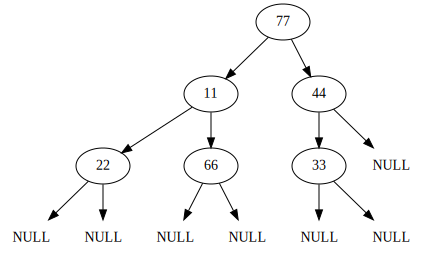

In [ ]:
display(bintree1.get_digraph_simple())

In [ ]:
bintree1.heapify_all()

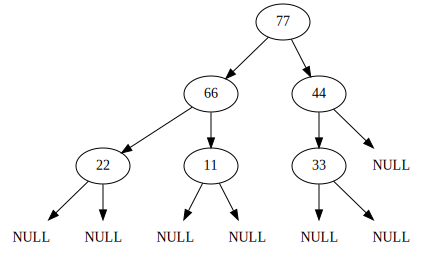

In [ ]:
display(bintree1.get_digraph_simple())

In [ ]:
arraymaxheap = ArrayMaxHeap(int, 4)

In [ ]:
arraymaxheap.insert(50)

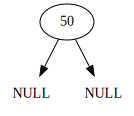

In [ ]:
display(arraymaxheap.get_digraph_simple())

In [ ]:
arraymaxheap.insert(40)

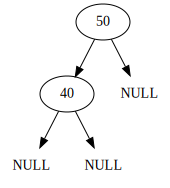

In [ ]:
display(arraymaxheap.get_digraph_simple())

In [ ]:
arraymaxheap.insert(70)

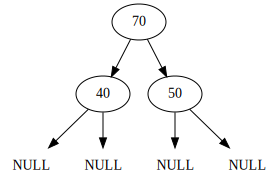

In [ ]:
display(arraymaxheap.get_digraph_simple())

In [ ]:
arraymaxheap.insert(43)

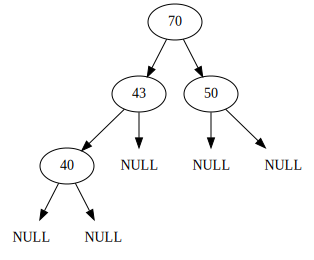

In [ ]:
display(arraymaxheap.get_digraph_simple())

In [ ]:
arraymaxheap.insert(60)

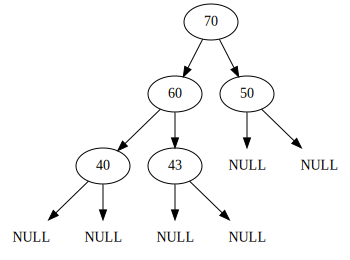

In [ ]:
display(arraymaxheap.get_digraph_simple())

In [ ]:
arraymaxheap.delete()

70

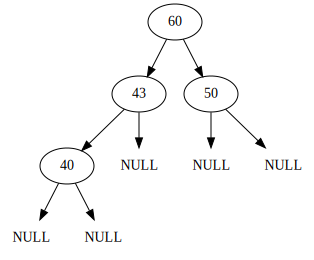

In [ ]:
display(arraymaxheap.get_digraph_simple())

In [ ]:
arraymaxheap.delete()

60

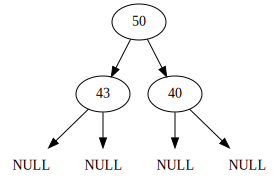

In [ ]:
display(arraymaxheap.get_digraph_simple())